<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ML/lab_16_neural_network_feed_forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

This exercise gives an implementation of a neural network with feed forward propagation.

Neural Network
    - A neural network has input layers, hidden layers and output layers.
    - It uses an activation function. In this exercise we are using sigmoid activation function.
    - Learning of weights is done using gradient descent algorithm.

Ref: Neural Networks and Deep Learning (deeplearning.ai) by Andrew Ng, Adjunct Professor, Stanford University @ Coursera.

## 1. Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline


## 2 - Neural Network model

**Mathematically**:

For one example $x $:

For layer 1:


$$z^{[1]} =  W^{[1]} x + b^{[1]}\tag{1}$$  


$$a^{[2]} = \sigma(z^{[1]} ) \tag{2}$$


For layer 2:

$$z^{[2]} = W^{[2]} a^{[2]} + b^{[2]}\tag{3}$$


$$ a^{[3]} = \sigma(z^{[2]})\tag{4}$$


Predicted values for the output layer is given as follows:

$$ \hat{y} = \begin{cases} 1 & \mbox{if } a^{[3]} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$


Given the predictions on all the examples, you can also compute the cost $J$ as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y\log\left(a^{[3]}\right) + (1-y)\log\left(1- a^{[3]}\right)  \large  \right) \small \tag{6}$$





**Methodology**:

The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc).
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Update parameters (gradient descent)


### (a) Define the neural network structure

In [2]:
# Define the neural network structure -- layer sizes

def initialize_sizes(X, Y):
    n_x = X.shape[1]
    n_h = X.shape[1] + 1 # my assumption
    n_y = Y.shape[1]
    size = {'n_x': n_x,
            'n_h': n_h,
            'n_y': n_y}
    return size

### (b) Initialize the model's parameters

In [3]:
# initialize parameters or weights

def initialize_parameter(size):
    n_x = size['n_x']
    n_h = size['n_h']
    n_y = size['n_y']
    W1 = np.random.randn(n_x, n_h) * 0.01
    b1 = np.random.randn(1,n_h)
    W2 = np.random.randn(n_h, n_y) * 0.01
    b2 = np.random.randn(1,n_y)
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2 }
    return parameters

### (c) Define the activation function

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### (c) forward propagation

In [5]:
# forward propagation

def forward_propagation(X, parameters):
    learning_rate = 0.001
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']


    # Implement Forward Propagation to calculate actiation A (probabilites)
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache


### (d) Compute loss

In [6]:
def compute_cost(A2, Y):

    # compute cost
    m = Y.shape[0] # number of samples

    logprobs = np.multiply(np.log(A2),Y)
    cost = - np.sum(logprobs)
    float(np.squeeze(cost))

    return cost

### (e) Compute gradients using Back propagation

In [7]:
def sigmoid_derivative(z):
    return z * (1-z)

In [8]:
def backward_propagation(X, Y, parameters, cache):

    m = X.shape[0] # number of samples

    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']

    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']

    # Backward propagation: calculate dW1, db1, dW2, db2.
    # layer 2
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis = 0, keepdims = True)
    # layer 1
    dZ1 = np.multiply(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis = 0, keepdims = True)
    ### END CODE HERE ###

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

### (f) Update parameters

In [9]:
def update_parameters(parameters, grads, learning_rate = 1.2):

    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']


    # Retrieve each gradient from the dictionary "grads"

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']


    # Update rule for each parameter

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

### (g) Prediction

In [10]:
def predict(X, parameters):

    # Computes probabilities using forward propagation
    A2, cache = forward_propagation(X, parameters)

    # Classify to 0/1 using 0.5 as the threshold.
    predictions = np.where(A2 < 0.5, 0, 1)

    return predictions

### (g) Visualization

In [11]:
# visualise the input
def visualize(X, Y):
    colors = ("red", "blue")
    labels = Y.flatten()
    plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=labels,
                cmap = matplotlib.colors.ListedColormap(colors) )
    plt.title('Scatter plot')
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    plt.xticks([0,1])
    plt.yticks(np.arange(0, 1.1, step=1))
    plt.show()

In [12]:
# visualize the predicted values and the decision boundary

def decision_boundary(X, Y, parameters):
    W2 = parameters['W2']
    b2 = parameters['b2']
    colors = ("red", "blue")

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = .02  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], parameters)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), edgecolors='k',
                cmap = matplotlib.colors.ListedColormap(colors))

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('Scatter plot')
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    plt.show()

In [13]:
# plot the cost function
def plot_cost_function(cost_history):
    plt.plot(cost_history)
    plt.title('Cost Function')
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()

## 3. Implementation of OR gate

In [14]:
# This example is an implementation of OR gate

# Number of input neurons = 2
# Number of output neurons = 1

# Training input sample
X = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])

# Training output sample
Y = np.array([[0],[1],[1],[1]])

#visualize(X,Y)

In [15]:
print('Before training')
size = initialize_sizes(X, Y)
print(size)

weights = initialize_parameter(size)
print('W1 = ', weights['W1'])
print('b1 = ', weights['b1'])
print('W2 = ', weights['W2'])
print('b2 = ', weights['b2'])


print('\n Training... \n')
cost_history = []

for i in range(0, 2000):

    # Forward propagation.
    A2, cache = forward_propagation(X, weights)

    # Cost function.
    cost = compute_cost(A2, Y )
    cost_history.append(cost)

    # Backpropagation.
    grads = backward_propagation(X, Y, weights, cache)

    # Gradient descent parameter update.
    weights = update_parameters(weights, grads)

    # Print the cost every 100 iterations
    if i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))

print('After training')
print('W1 = ', weights['W1'])
print('b1 = ', weights['b1'])
print('W2 = ', weights['W2'])
print('b2 = ', weights['b2'])


Before training
{'n_x': 2, 'n_h': 3, 'n_y': 1}
W1 =  [[-0.00653885  0.00988557 -0.010573  ]
 [ 0.00480525  0.0267854  -0.02120023]]
b1 =  [[-1.01042669 -1.66728141 -1.74813861]]
W2 =  [[-0.00167235]
 [-0.01395681]
 [-0.0011706 ]]
b2 =  [[-0.1866454]]

 Training... 

Cost after iteration 0: 2.377177
Cost after iteration 100: 0.332455
Cost after iteration 200: 0.073235
Cost after iteration 300: 0.035215
Cost after iteration 400: 0.022353
Cost after iteration 500: 0.016126
Cost after iteration 600: 0.012510
Cost after iteration 700: 0.010167
Cost after iteration 800: 0.008534
Cost after iteration 900: 0.007335
Cost after iteration 1000: 0.006419
Cost after iteration 1100: 0.005698
Cost after iteration 1200: 0.005117
Cost after iteration 1300: 0.004640
Cost after iteration 1400: 0.004240
Cost after iteration 1500: 0.003901
Cost after iteration 1600: 0.003611
Cost after iteration 1700: 0.003359
Cost after iteration 1800: 0.003138
Cost after iteration 1900: 0.002944
After training
W1 =  [[5.

In [16]:
# Actual observation
y = Y.flatten()
print('Actual output', y)

# predicted values
yhat = predict(X, weights).flatten()
print('Predicted output', yhat)

# Compute accuracy

print ('Accuracy: %d' % float((np.dot(y, yhat.T) + np.dot(1-y, 1-yhat.T))
                              /float(y.size)*100) + '%')


Actual output [0 1 1 1]
Predicted output [0 1 1 1]
Accuracy: 100%


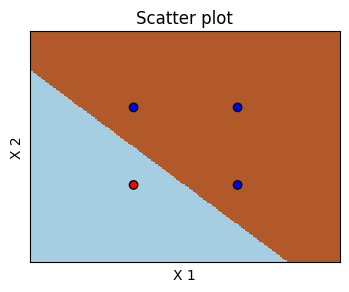

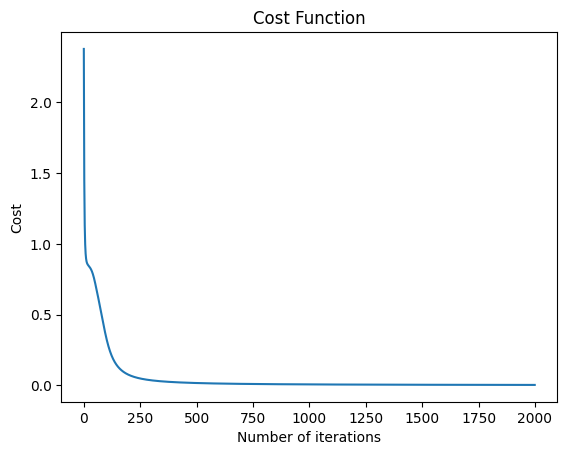

In [17]:
# Visualization of decision boundary and loss function
decision_boundary(X, Y, weights)
plot_cost_function(cost_history)

# Implementation of XOR

In [18]:
# This example is an implementation of XOR gate

# Number of input neurons = 2
# Number of output neurons = 1

# Training input sample
xor_X = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])

# Training output sample
xor_Y = np.array([[0],[1],[1],[0]])

#visualize(xor_X, xor_Y)

In [19]:
print('Before training')
xor_size = initialize_sizes(xor_X, xor_Y)
print(xor_size)

xor_weights = initialize_parameter(xor_size)
print('W1 = ', xor_weights['W1'])
print('b1 = ', xor_weights['b1'])
print('W2 = ', xor_weights['W2'])
print('b2 = ', xor_weights['b2'])

print('\n Training... \n')
xor_cost_history = []

for i in range(0, 20000):

    # Forward propagation.
    xor_A2, xor_cache = forward_propagation(xor_X, xor_weights)

    # Cost function.
    xor_cost = compute_cost(xor_A2, xor_Y )
    xor_cost_history.append(xor_cost)

    # Backpropagation.
    xor_grads = backward_propagation(xor_X, xor_Y, xor_weights, xor_cache)

    # Gradient descent parameter update.
    xor_weights = update_parameters(xor_weights, xor_grads)

    ### END CODE HERE ###

    # Print the cost every 1000 iterations
    if i % 1000 == 0:
        print ("Cost after iteration %i: %f" %(i, xor_cost))

print('After training')
print('W1 = ', xor_weights['W1'])
print('b1 = ', xor_weights['b1'])
print('W2 = ', xor_weights['W2'])
print('b2 = ', xor_weights['b2'])


Before training
{'n_x': 2, 'n_h': 3, 'n_y': 1}
W1 =  [[0.01134101 0.00380998 0.00478596]
 [0.00749347 0.0045136  0.0035077 ]]
b1 =  [[ 0.66376918 -0.06014882  0.11150022]]
W2 =  [[-0.01966678]
 [ 0.01290707]
 [-0.00208   ]]
b2 =  [[-1.30872641]]

 Training... 

Cost after iteration 0: 3.108117
Cost after iteration 1000: 0.927286
Cost after iteration 2000: 0.014202
Cost after iteration 3000: 0.006312
Cost after iteration 4000: 0.004021
Cost after iteration 5000: 0.002940
Cost after iteration 6000: 0.002313
Cost after iteration 7000: 0.001905
Cost after iteration 8000: 0.001618
Cost after iteration 9000: 0.001405
Cost after iteration 10000: 0.001242
Cost after iteration 11000: 0.001112
Cost after iteration 12000: 0.001007
Cost after iteration 13000: 0.000920
Cost after iteration 14000: 0.000846
Cost after iteration 15000: 0.000784
Cost after iteration 16000: 0.000730
Cost after iteration 17000: 0.000682
Cost after iteration 18000: 0.000641
Cost after iteration 19000: 0.000604
After train

In [20]:
# Actual observation
xor_y = xor_Y.flatten()
print('Actual output', xor_y)

# predicted values
xor_yhat = predict(xor_X, xor_weights).flatten()
print('Predicted output', xor_yhat)

# Compute accuracy

print ('Accuracy: %d' % float((np.dot(xor_y, xor_yhat.T) + np.dot(1-xor_y, 1-xor_yhat.T))
                              /float(xor_y.size)*100) + '%')


Actual output [0 1 1 0]
Predicted output [0 1 1 0]
Accuracy: 100%


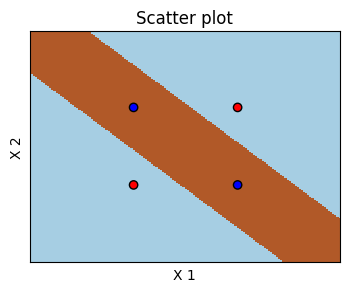

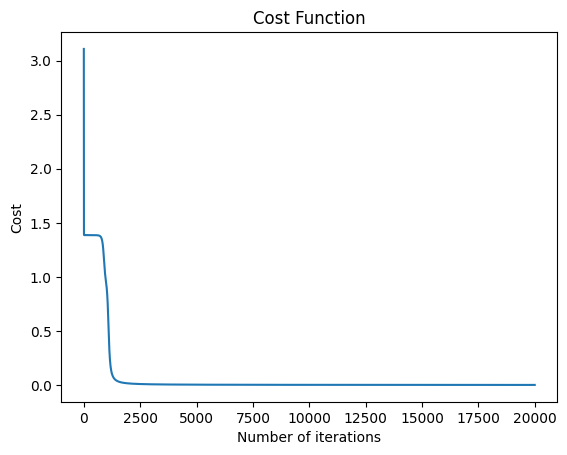

In [21]:
# Visualization of decision boundary and loss function
decision_boundary(xor_X, xor_Y, xor_weights)
plot_cost_function(xor_cost_history)